In [1]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/eddie/OneDrive/Documents/Injury Dataset/2013-2022/2018-2022 Data Cleaned Trainable.csv')

X = pd.DataFrame(dataset.iloc[:,:22].values)
Y = pd.DataFrame(dataset.iloc[:,22:].values)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(Y_train.shape)

       0   1   2   3   4   5   6   7   8   9   ...  12  13  14   15  16  17  \
0       1   1   1   1   0   1   3  55   1   1  ...   0   0   1    0   0   1   
1       1   1   1   1   0   1   0  16   1   1  ...   0   0   1    0   0   1   
2       1   1   1   1   3   0   3  41   1   1  ...   0   1   1    0   1   1   
3       1   1   2   2   3   0   0  21   2   1  ...   0   0   1    0   0   1   
4       1   1   2   1   3   0   1  66   1   1  ...   0   0   1  174   0   1   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ...  ..  ..   
44090   2   4   1   2   0   1   0  53   1   1  ...   1   0   1    0   0   1   
44091   2   4   1   2   0   1   2  27   1   1  ...   1   0   1    0   1   1   
44092   2   4   1   2   1   0   1  25   1   1  ...   1   1   1  155   0   1   
44093   2   4   1   2   1   0   1  21   2   1  ...   1   1   1  120   0   0   
44094   2   4   1   1   0   1   1  43   1   1  ...   0   1   1   70   1   1   

       18  19  20  21  
0       2   2   3   1  
1  

In [2]:
features = pd.DataFrame(dataset.iloc[:,:32])
features = features.columns
print(features)

Index(['STATE', 'SEASON', 'DAY', 'HOUR', 'HARM_EV', 'MAN_COLL', 'BODY_TYP',
       'AGE', 'GENDER', 'PER_TYP', 'SEAT_POS', 'REST_USE', 'AIR_BAG',
       'DRINKING', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DSTATUS', 'ETHNICITY ',
       'RUR_URB', 'FUNC_SYS', 'IMPACT1', 'INJ_SEV'],
      dtype='object')


In [3]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier

In [4]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, Y_train)


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [5]:
res = model.predict(X_test)
print(res)
print(Y_test)

[2 2 0 ... 0 2 2]
       0
28001  2
19399  2
32571  0
7147   0
26767  0
...   ..
3804   2
17055  2
33031  0
23604  1
8367   2

[8819 rows x 1 columns]


In [6]:
model.predict_proba(X_test)

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [7]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

0.8633631931057943
              precision    recall  f1-score   support

           0   0.677791  0.683599  0.680683      1634
           1   0.664450  0.656904  0.660655      1673
           2   0.978430  0.979318  0.978874      5512

    accuracy                       0.863363      8819
   macro avg   0.773557  0.773273  0.773404      8819
weighted avg   0.863164  0.863363  0.863257      8819



[2 2 0 ... 0 2 2]
       0
28001  2
19399  2
32571  0
7147   0
26767  0
...   ..
3804   2
17055  2
33031  0
23604  1
8367   2

[8819 rows x 1 columns]


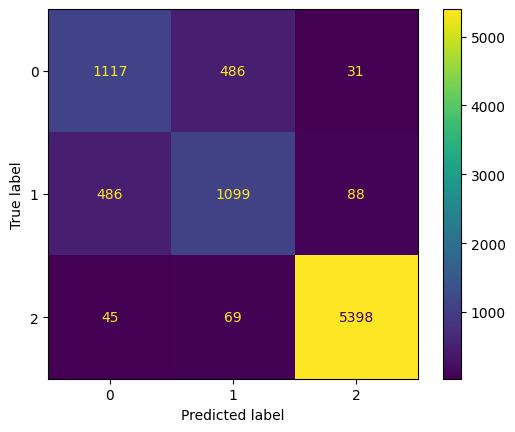

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

res = np.array(res)
print(res)
print(Y_test)
cm = confusion_matrix(Y_test, res)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PermutationExplainer explainer: 8820it [5:25:06,  2.21s/it]                            


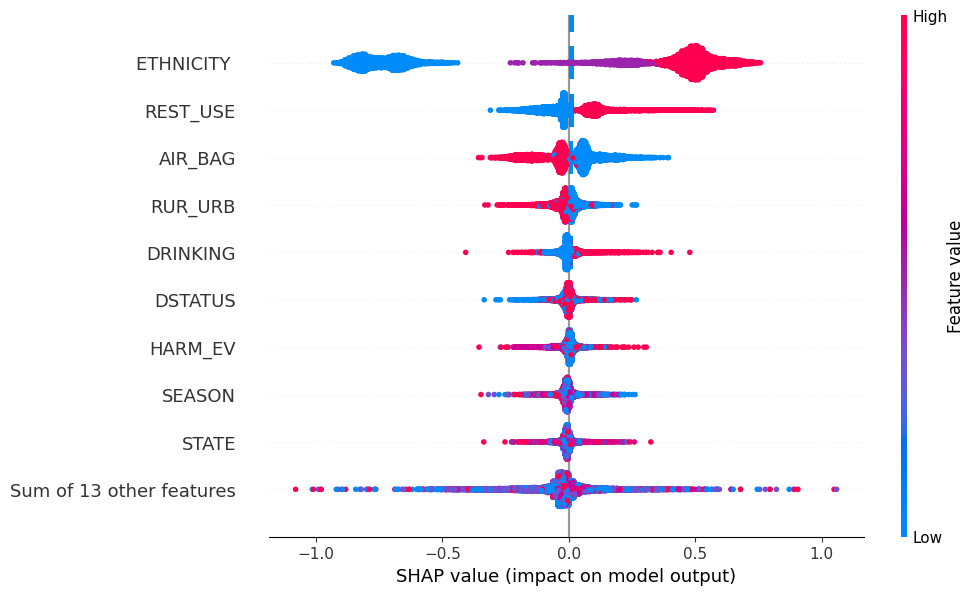

In [9]:
import shap
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values,X_train,feature_names = features,plot_type="bar", plot_size=(20,15),show=False)

explanation = shap.Explanation(
    values=shap_values, 
    feature_names=features
)
shap.plots.beeswarm(explanation)

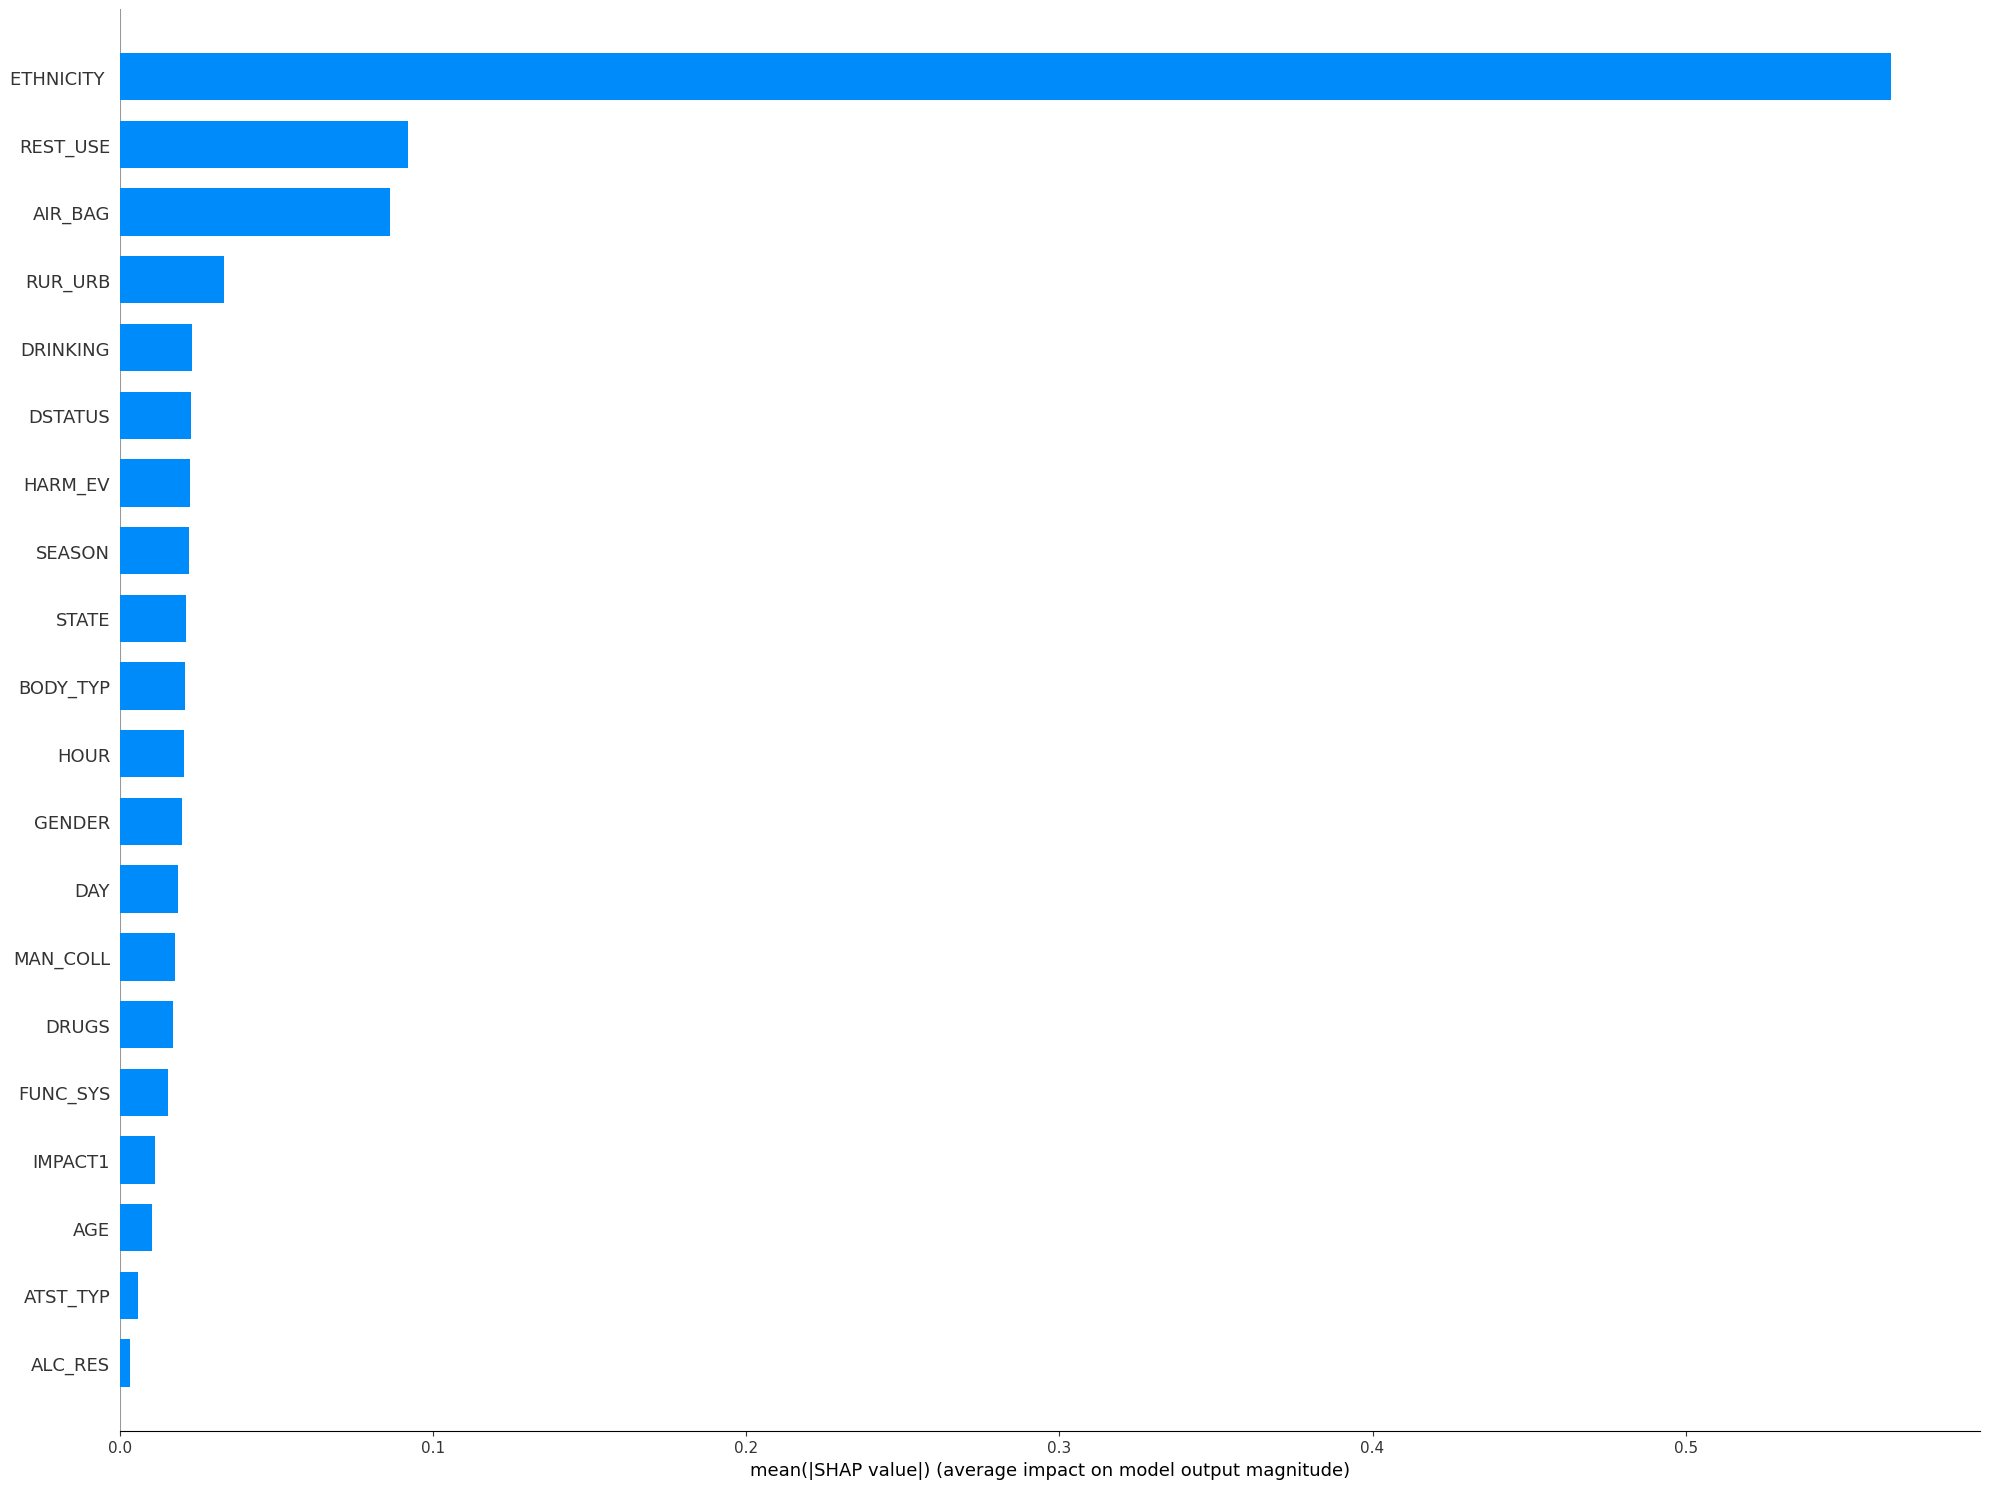

In [10]:
shap.summary_plot(shap_values,X_train,feature_names = features,plot_type="bar", plot_size=(20,15),show=False)
